In [ ]:
#importing libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_absolute_error, r2_score

In [6]:
#reading datasets and checking null values

df=pd.read_csv("project datsets.csv")
print(df.head())
print (df.isnull().sum())
df.fillna(0,inplace=True)
print(df.shape)

  Country/Region  Confirmed  Deaths  Recovered  Active  New cases  New deaths  \
0    Afghanistan      36263    1269      25198    9796        106          10   
1        Albania       4880     144       2745    1991        117           6   
2        Algeria      27973    1163      18837    7973        616           8   
3        Andorra        907      52        803      52         10           0   
4         Angola        950      41        242     667         18           1   

   New recovered  Deaths / 100 Cases  Recovered / 100 Cases  \
0             18                3.50                  69.49   
1             63                2.95                  56.25   
2            749                4.16                  67.34   
3              0                5.73                  88.53   
4              0                4.32                  25.47   

   Deaths / 100 Recovered  Confirmed last week  1 week change  \
0                    5.04                35526            737   
1   

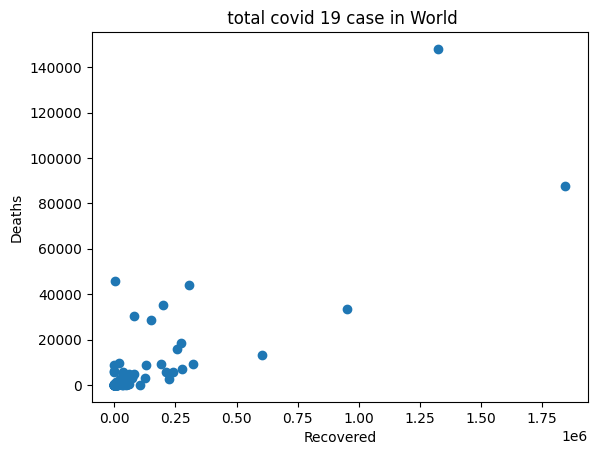

In [7]:
#plotting graph between Recovered and Deaths
plt.figure()
plt.scatter(df["Recovered"],df["Deaths"])
plt.title(" total covid 19 case in World")
plt.xlabel("Recovered")
plt.ylabel("Deaths")
plt.show()

In [8]:
# feature selection
X = df[['Confirmed', 'Recovered', 'Active']]
y = df['Deaths']

In [9]:
#train test split method.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [10]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, r2_score
from sklearn.model_selection import train_test_split

#train test split method.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# ML Alogorithm.(Linear Regression.)
lr = LinearRegression()
lr.fit(X_train, y_train)
y_pred_lr = lr.predict(X_test)
print("Linear Regression MAE:", mean_absolute_error(y_test, y_pred_lr))
print("Linear Regression R2:",r2_score(y_test, y_pred_lr))

Linear Regression MAE: 1.6446317991680142e-11
Linear Regression R2: 1.0


In [11]:
from sklearn.tree import DecisionTreeRegressor

#Decision tree regression.
dt = DecisionTreeRegressor(random_state=42)
dt.fit(X_train, y_train)

y_pred_dt = dt.predict(X_test)

print("Decision Tree MAE:", mean_absolute_error(y_test, y_pred_dt))
print("Decision Tree R2:", r2_score(y_test, y_pred_dt))

Decision Tree MAE: 4368.5
Decision Tree R2: -0.45291137808644666


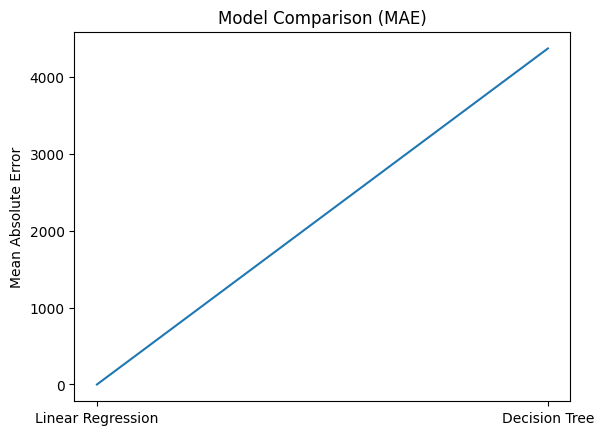

In [12]:
# model regresssion and Decision tress.
models = ['Linear Regression', 'Decision Tree']
mae_scores = [
    mean_absolute_error(y_test, y_pred_lr),
    mean_absolute_error(y_test, y_pred_dt)]

plt.plot(models, mae_scores)
plt.title("Model Comparison (MAE)")
plt.ylabel("Mean Absolute Error")
plt.show()

In [ ]:
#Interactive prediction system:
print("Enter values to predict Deaths")

confirmed = int(input("Confirmed cases: "))
recovered = int(input("Recovered cases: "))
active = int(input("Active cases: "))

prediction = dt.predict([[confirmed, recovered, active]])

print("Predicted Deaths:", int(prediction[0]))